# 실습 - Neural Networks


# **1. 필요한 라이브러리 불러오기**

In [2]:
# 데이터, 시각화 관련 라이브러리
import numpy as np
import matplotlib.pyplot as plt

# Keras 라이브러리 
from tensorflow import keras
from tensorflow.keras import layers

# **2. MNIST 데이터 불러오기 및 전처리**

In [3]:
# Model / data parameter 설정
num_classes = 10
input_shape = (28, 28, 1)

In [4]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape  # 60000장, 28*28 img

(60000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
y_train.shape

(60000,)

In [8]:
y_train[1]

0

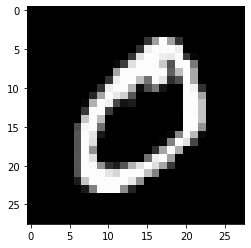

In [9]:
# 데이터를 이미지로 표현하기
plt.imshow(x_train[1].reshape(28, 28))
plt.gray()
plt.show()

In [10]:
# 이미지 scailing [0,255] ==> [0,1]

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [11]:
x_train[0,:,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
# 이미지를 (28, 28, 1) 모양으로 변환
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [13]:
# one-hot-encoding으로 변환 예) 0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
y_train.shape

(60000, 10)

# **3. 모델 생성**

In [16]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

# **4. 학습하기(training)**

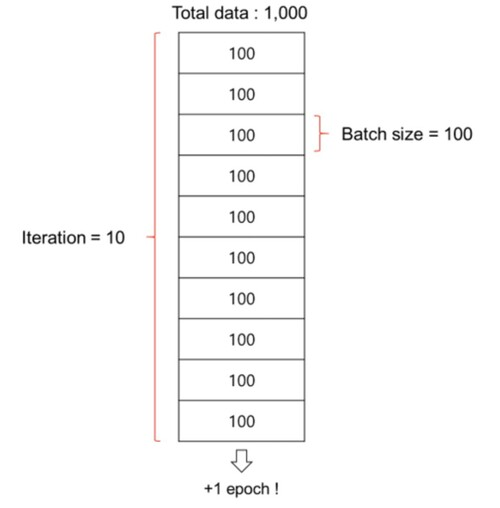

In [17]:
# mini-batch 사이즈(한번 weight를 업데이트하기 위해 필요한 데이터의 양)
batch_size = 128

# epoch(학습과정에서 전체데이터의 사용 횟수)
epochs = 15

# objective function, optimizer 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 학습(training, fitting)
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 33s 76ms/step - loss: 0.2875 - accuracy: 0.9215 - val_loss: 0.0741 - val_accuracy: 0.9790
Epoch 2/15
422/422 [==============================] - 32s 75ms/step - loss: 0.0744 - accuracy: 0.9774 - val_loss: 0.0550 - val_accuracy: 0.9857
Epoch 3/15
422/422 [==============================] - 31s 74ms/step - loss: 0.0543 - accuracy: 0.9836 - val_loss: 0.0467 - val_accuracy: 0.9875
Epoch 4/15
422/422 [==============================] - 36s 84ms/step - loss: 0.0439 - accuracy: 0.9866 - val_loss: 0.0439 - val_accuracy: 0.9882
Epoch 5/15
422/422 [==============================] - 32s 75ms/step - loss: 0.0369 - accuracy: 0.9883 - val_loss: 0.0482 - val_accuracy: 0.9868
Epoch 6/15
422/422 [==============================] - 31s 73ms/step - loss: 0.0321 - accuracy: 0.9902 - val_loss: 0.0379 - val_accuracy: 0.9892
Epoch 7/15
422/422 [==============================] - 33s 78ms/step - loss: 0.0271 - accuracy: 0.9918 - val_loss: 0.0389 - val_accuracy:

# **5. 학습결과 확인**

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03127704933285713
Test accuracy: 0.9907000064849854
